In [2]:
#interpret variant prediciton from esm

import pandas as pd


In [10]:
# read in labeled data

def read_labeled(in_data):
    
    in_df = pd.read_csv(in_data, index_col = 0)
    print(in_df)
    return in_df
    
#read_1 = read_labeled("../esm/acr_dms_sample_data_labeled.csv")
#read_2 = read_labeled("../esm/plt_ee_vs_llh.csv")
#read_3 = read_labeled("../../esm/2023May08_sum_mat_labeled.csv")
#read_4 = read_labeled("../esm/2023Jun07_d_radiodurans_tnpb_labeled.csv")
#print(read_4)
read_acrIIa4_v1 = read_labeled("../esm/2023May08_sum_mat_labeled.csv")

# CR-Methods Review

#read_acrIIa2 = read_labeled("../../acrobatx platform development/AGX101_documents/Marsiglia_etal_CellReportsMethods/CR-Methods-Review/analysis/analysisII_acr_esm_hotspot_analysis/2024Feb21_acrIIa2_mut_labeled.csv")
#read_acrIIa4 = read_labeled("../../acrobatx platform development/AGX101_documents/Marsiglia_etal_CellReportsMethods/CR-Methods-Review/analysis/analysisII_acr_esm_hotspot_analysis/2024Feb21_acrIIa4_mut_labeled.csv")
#read_acrIIa6 = read_labeled("../../acrobatx platform development/AGX101_documents/Marsiglia_etal_CellReportsMethods/CR-Methods-Review/analysis/analysisII_acr_esm_hotspot_analysis/2024Feb21_acrIIa6_mut_labeled.csv")

    

          esm1v_t33_650M_UR90S_1  esm1v_t33_650M_UR90S_2  \
mut_call                                                   
M1G                   -13.884749              -12.725121   
M1P                   -14.811955              -12.645957   
M1A                   -13.671631              -12.892581   
M1V                   -12.301721              -11.284904   
M1L                   -12.927552              -11.310517   
...                          ...                     ...   
N87Q                   -4.868649               -4.815822   
N87E                   -3.493513               -3.325724   
N87D                   -4.022992               -4.150425   
N87S                   -3.780619               -3.914800   
N87T                   -4.186879               -4.180735   

          esm1v_t33_650M_UR90S_3  esm1v_t33_650M_UR90S_4  \
mut_call                                                   
M1G                   -12.823805              -12.864269   
M1P                   -13.387526       

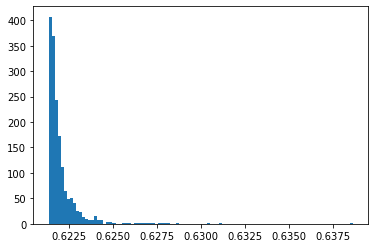

          esm1v_t33_650M_UR90S_1  esm1v_t33_650M_UR90S_2  \
mut_call                                                   
M1G                   -13.884749              -12.725121   
M1P                   -14.811955              -12.645957   
M1A                   -13.671631              -12.892581   
M1V                   -12.301721              -11.284904   
M1L                   -12.927552              -11.310517   
...                          ...                     ...   
N87Q                   -4.868649               -4.815822   
N87E                   -3.493513               -3.325724   
N87D                   -4.022992               -4.150425   
N87S                   -3.780619               -3.914800   
N87T                   -4.186879               -4.180735   

          esm1v_t33_650M_UR90S_3  esm1v_t33_650M_UR90S_4  \
mut_call                                                   
M1G                   -12.823805              -12.864269   
M1P                   -13.387526       

In [11]:
# compute entropy of model predictions
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import entropy

def compute_entropy(in_df, cutoff):
    
    for index, row in in_df.iterrows():

        #print(row)
        preds = row[["esm1v_t33_650M_UR90S_1", "esm1v_t33_650M_UR90S_2", "esm1v_t33_650M_UR90S_3", "esm1v_t33_650M_UR90S_4", 
                    "esm1v_t33_650M_UR90S_5"]].values.astype(np.float64)
        #print(preds.dtype)
        entrpy = entropy(preds)
        if entrpy < cutoff:
            print(index)
        #print(entrpy)
        in_df.loc[index, "inv_entropy"] = 1 / entrpy
        
    #plt.scatter(in_df["avg_edit_rate"], in_df["entropy"], alpha = 0.15)
    #plt.show()
    #plt.scatter(in_df["avg_edit_rate"], in_df["sum"], alpha = 0.15)
    
    plt.hist(in_df["inv_entropy"], bins = 100)
    plt.show()
    
    #print(in_df)
    filtered_df = in_df[in_df["inv_entropy"] >= cutoff]
    print(filtered_df)
    #filtered_df.to_csv("../")
    return filtered_df

#comp_1 = compute_entropy(read_1, 0)
#comp_3 = compute_entropy(read_3)
#comp_4 = compute_entropy(read_4)

# evaluate entropy across ensembles

#acrIIa2_compute = compute_entropy(read_acrIIa2, 0)
acrIIa4_compute = compute_entropy(read_acrIIa4_v1, 0)
#acrIIa6_compute = compute_entropy(read_acrIIa6, 0.6)
    
    

In [8]:
print(comp_1)

                                                    avg_edit_rate  \
mut_call                                                            
Q65A                                                        0.063   
N48A                                                        0.119   
W63A                                                        0.320   
G21A                                                        0.177   
F55A                                                        0.638   
...                                                           ...   
E47RN48TE49FK60QN61WG62WW63MN64GQ65ME66WY67HE68...          0.567   
E47NN48WE49HK60WN61CG62WW63SN64WQ65WE66KY67RE68...          0.480   
E47RN48QE49GK60CN61CG62MW63RN64SQ65YE66MY67ME68...          0.674   
E47PN48RE49FK60WN61RG62QW63CN64GQ65FE66WY67QE68...          0.633   
E47WN48WE49WK60NN61LG62TW63CN64YQ65WE66HY67RE68...          0.625   

                                                    esm1v_t33_650M_UR90S_1  \
mut_call                

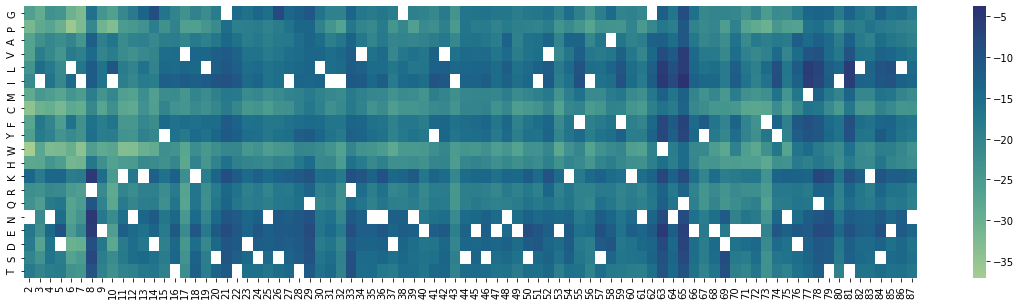

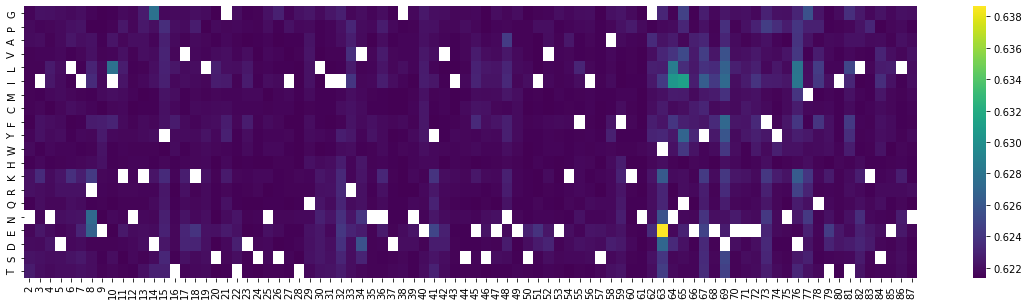

In [12]:
# plot heatmap of model scores where column is position and index is amino acid substition change

import re
import seaborn as sns

def plt_hmaps(in_df, ref_seq, cutoff):

    grep_str = r"(\D)([0-9]+)(\D)"
    #print(in_df)
    #print(list(ref_seq))
    
    aas = ["G", "P", "A", "V", "L", "I", "M", "C", "F", "Y", "W", "H",
          "K", "R", "Q", "N", "E", "D", "S", "T"]
    
    sum_score_mut_df = pd.DataFrame(columns = range(cutoff, len(ref_seq)), index = aas)
    entrpy_score_mut_df = pd.DataFrame(columns = range(cutoff, len(ref_seq)), index = aas)
    #print(mut_df)
    #print(in_df)
        
    for index, row in in_df.iterrows():

        find = re.findall(grep_str, index)[0]
        #print(find)
        #print(row)
        wt_seq = find[0]
        pos = int(find[1])
        mut_seq = find[2]
        #print(mut_seq)
        sum_scores = row["esm1v_t33_650M_UR90S_1"] + row["esm1v_t33_650M_UR90S_2"] + row["esm1v_t33_650M_UR90S_3"] + row["esm1v_t33_650M_UR90S_4"] #+ row["esm1v_t33_650M_UR90S_5"]
        #print(sum_scores)
        if pos >= cutoff:
            sum_score_mut_df.loc[mut_seq, pos] = sum_scores
            entrpy_score_mut_df.loc[mut_seq, pos] = row["inv_entropy"]
            
    mask_1 = sum_score_mut_df.isnull()
    fig, ax = plt.subplots(figsize=(20, 5))
    #print(sum_score_mut_df)
    plot_sum_df = sum_score_mut_df.fillna(0)
    sns.heatmap(plot_sum_df, mask=mask_1, cmap="crest")
    
    #print(entrpy_score_mut_df)
    plt.show()
    mask_2 = entrpy_score_mut_df.isnull()
    plt_sum_df_2 = entrpy_score_mut_df.fillna(0)
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.heatmap(plt_sum_df_2, cmap="viridis", mask=mask_2)
    #plt.savefig("../../acrobatx platform development/AGX101_documents/Marsiglia_etal_CellReportsMethods/CR-Methods-Review/analysis/analysisII_acr_esm_hotspot_analysis/2024Feb_acrIIa6_hotspot_hmap.pdf",
    #           bbox_inches = "tight")
    
    
    return entrpy_score_mut_df
    
#plt_1 = plt_hmaps(comp_1, "MNINDLIREIKNKDYTVKLSGTDSNSITQLIIRVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSELN", 0)
#plt_2 = plt_hmaps(comp_4, "MIRNKAFVVRLYPNAAQTELINRTLGSARFVYNHFLARRIAAYKESGKGLTYGQTSSELTLLKQAEETSWLSEVDKFALQNSLKNLETAYKNFFRTVKQSGKKVGFPRFRKKRTGESYRTQFTNNNIQIGEGRLKLPKLGWVKTKGQQDIQGKILNVTVRRIHEGHYEASVLCEVEIPYLPAAPKFAAGVDVGIKDFAIVTDGVRFKHEQNPKYYRSTLKRLRKAQQTLSRRKKGSARYGKAKTKLARIHKRIVNKRQDFLHKLTTSLVREYEIIGTEHLKPDNMRKNRRLALSISDAGWGEFIRQLEYKAAWYGRLVSKVSPYFPSSQLCHDCGFKNPEVKNLAVRTWTCPNCGETHDRDENAALNIRREALVAAGISDTLNAHGGYVRPASAGNGLRSENHATLVV", 2)

#plt_acrIIa2 = plt_hmaps(acrIIa2_compute, "MTLTRAQKKYAEAMHEFINMVDDFEESTPDFAKEVLHDSDYVVITKNEKYAVALCSLSTDECEYDTNLYLDEKLVDYSTVDVNGVTYYINIVETNDIDDLEIATDEDEMKSGNQEIILKSELK", 2)
plt_acrIIa4 = plt_hmaps(acrIIa4_compute, "MNINDLIREIKNKDYTVKLSGTDSNSITQLIIRVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSELN", 2)
#plt_acrIIa6 = plt_hmaps(acrIIa6_compute, "MKINDDIKELILEYMSRYFKFENDFYKLPGIKFTDANWQKFKNGGTDIEKMGAARVNAMLDCLFDDFELAMIGKAQTNYYNDNSLKMNMPFYTYYDMFKKQQLLKWLKNNRDDVIGGTGRMYTASGNYIANAYLEVALESSSLGSGSYMLQMRFKDYSKGQEPIPSGRQNRLEWIENNLENIR", 2)



In [37]:
plt_acrIIa6

,2,3,4,5,6,7,8,9,10,11,...,174,175,176,177,178,179,180,181,182,183
G,0.621755,0.621774,0.621657,0.621646,0.621521,0.621959,0.621374,0.621557,0.621671,0.623594,...,0.622584,0.621931,0.622484,0.621449,0.621545,0.624702,0.62145,0.621488,0.622011,0.622112
P,0.622197,0.621488,0.626542,0.621805,0.622332,0.621794,0.621466,0.621724,0.621612,0.624513,...,0.62351,0.621966,0.62276,0.622149,0.621891,0.62266,0.622586,0.621628,0.621646,0.621844
A,0.623861,0.621435,0.621499,0.621439,0.621853,0.623128,0.621397,0.621699,0.621424,0.623757,...,0.623859,0.621614,0.622761,0.621571,0.622882,0.622088,0.621431,0.621818,0.621749,0.621505
V,0.621543,0.621345,0.621583,0.622822,0.621696,0.62183,0.621512,0.621714,0.621412,0.621786,...,0.624211,0.621508,0.623081,0.622173,0.624212,0.621962,0.622166,0.621824,0.621386,0.621529
L,0.621908,0.62172,0.621785,0.624497,0.622181,0.621644,0.621454,0.622135,NaN,0.6215,...,0.62518,0.621549,0.625151,0.622186,0.623498,NaN,0.622098,0.62199,0.621607,0.621809
I,0.621897,NaN,0.621682,0.624198,0.622064,NaN,0.621648,0.62224,0.6215,NaN,...,0.625878,NaN,0.624043,0.622259,0.62449,0.621352,0.62218,0.622167,NaN,0.621674
M,0.621563,0.621669,0.621653,0.62399,0.621598,0.6215,0.621611,0.621593,0.621476,0.62157,...,0.622922,0.62159,0.622723,0.621615,0.622313,0.621514,0.621573,0.621503,0.621653,0.621642
C,0.621595,0.621396,0.621581,0.622233,0.621513,0.621794,0.621405,0.621648,0.621503,0.622626,...,0.622411,0.621451,0.622408,0.621581,0.622073,0.621881,0.62151,0.621493,0.621711,0.621366
F,0.621872,0.621766,0.62156,0.622927,0.621523,0.621672,0.621806,0.6214,0.621752,0.62193,...,0.624063,0.621528,0.624295,0.622602,0.624603,0.622121,0.622103,0.622401,0.621375,0.622299
Y,0.62175,0.621433,0.621585,0.623032,0.621519,0.621875,0.622171,0.621364,0.62166,0.622834,...,0.623516,0.622091,0.622721,0.62163,0.622385,0.622372,0.621753,0.621821,0.621818,0.621712


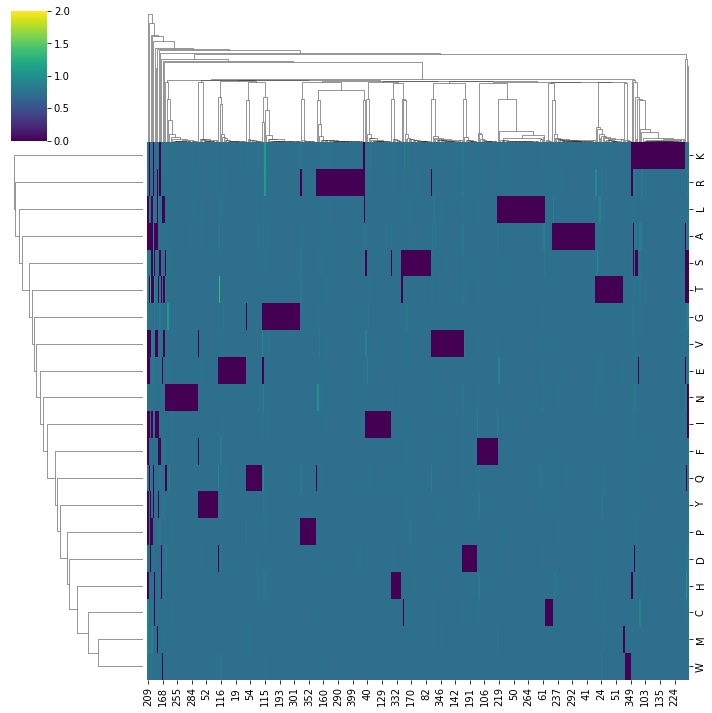

In [14]:
# cluster the sensitivity matrix and identify clusters with hifh sensitivity 

import seaborn as sns

plt_df = plt_2.fillna(0)
sns.clustermap(plt_df, cmap = "viridis", vmin = 0, vmax = 2)

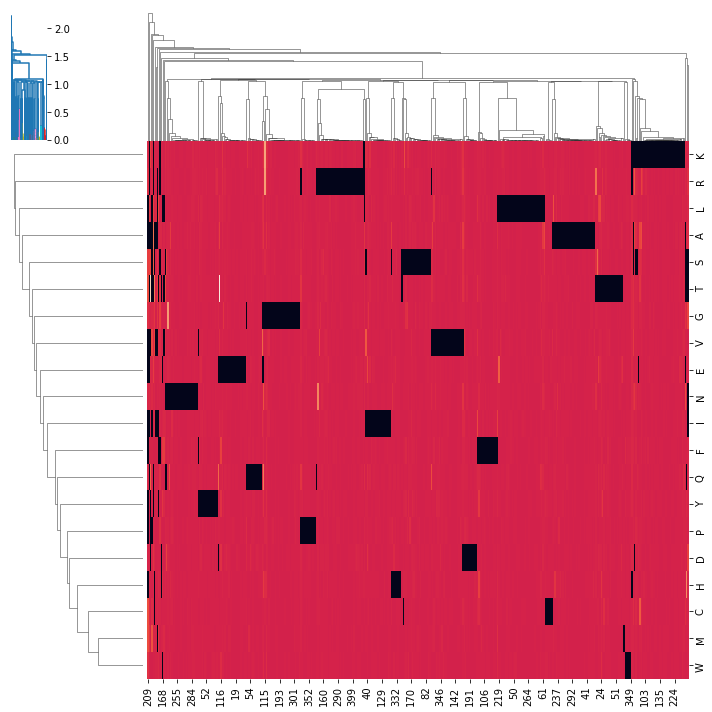

In [21]:
import seaborn
import scipy

g = seaborn.clustermap(plt_df,method='average')

den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_col.linkage,
#                                         labels = plt_df.index,
                                         color_threshold=0.60)  

#print(den)

from collections import defaultdict

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = {}
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

clusters = get_cluster_classes(den)

cluster = []
for i in plt_df.index:
    included=False
    for j in clusters.keys():
        if i in clusters[j]:
            cluster.append(j)
            included=True
    if not included:
        cluster.append(None)

plt_df["cluster"] = cluster


In [22]:
plt_df

,2,3,4,5,6,7,8,9,10,11,...,400,401,402,403,404,405,406,407,408,cluster
G,0.730888,0.723642,0.721908,0.724604,0.722058,0.728614,0.734671,0.722191,0.721987,0.721873,...,0.722104,0.724969,0.722732,0.731576,0.721366,0.722753,0.723338,0.723841,0.722935,None
P,0.725625,0.722836,0.725132,0.723321,0.722071,0.724181,0.727014,0.721748,0.724320,0.722179,...,0.725776,0.723846,0.722552,0.731441,0.722760,0.722301,0.722418,0.721481,0.722149,None
A,0.732281,0.735206,0.721993,0.724564,0.000000,0.724443,0.734239,0.723029,0.722046,0.723430,...,0.722265,0.724010,0.724197,0.726436,0.000000,0.724056,0.722989,0.723289,0.724992,None
V,0.725034,0.828126,0.724746,0.723594,0.723651,0.730474,0.000000,0.000000,0.722391,0.724329,...,0.723742,0.724372,0.724361,0.724523,0.722332,0.722121,0.721429,0.000000,0.000000,None
L,0.728936,0.730096,0.725845,0.723976,0.721812,0.724497,0.725920,0.748404,0.721778,0.000000,...,0.725127,0.725400,0.724950,0.724917,0.721695,0.724411,0.000000,0.721761,0.722192,None
I,0.000000,0.744668,0.724787,0.723664,0.724071,0.726035,0.722276,0.724998,0.722305,0.728299,...,0.721768,0.723300,0.723485,0.724910,0.723170,0.722287,0.721841,0.721848,0.721739,None
M,0.724932,0.723006,0.725102,0.724791,0.721805,0.723615,0.727703,0.724467,0.721968,0.723011,...,0.722171,0.723064,0.722656,0.722274,0.721533,0.722368,0.721675,0.721486,0.721685,None
C,0.723894,0.729707,0.723530,0.722629,0.722749,0.725579,0.722582,0.723038,0.721562,0.722328,...,0.721808,0.723354,0.722277,0.722019,0.721920,0.721924,0.721922,0.724040,0.721819,None
F,0.725568,0.723756,0.724663,0.722106,0.722044,0.000000,0.721580,-0.000000,0.721548,0.724216,...,0.722012,0.723461,0.722094,0.721608,0.721662,0.721809,0.721411,0.722292,0.722949,None
Y,0.727212,0.724645,0.725627,0.722218,0.722659,0.733481,0.722298,-0.000000,0.721775,0.727665,...,0.721558,0.724018,0.722269,0.722263,0.722023,0.722544,0.721958,0.722041,0.722720,None


           G         P         A         V         L         I         M  \
2   0.621572  0.621747  0.621877  0.621519  0.621525  0.621489  0.621481   
3   0.622135  0.621567  0.621897  0.621579  0.621477  0.000000  0.621458   
4   0.622021  0.621638  0.621520  0.621571  0.622488  0.622368  0.621730   
5   0.621926  0.621806  0.621755  0.621690  0.621936  0.621856  0.621863   
6   0.621750  0.622065  0.622319  0.621437  0.000000  0.621444  0.621652   
..       ...       ...       ...       ...       ...       ...       ...   
83  0.621741  0.623135  0.621782  0.621434  0.621634  0.621437  0.621444   
84  0.622154  0.621388  0.621864  0.623026  0.622613  0.623544  0.622329   
85  0.621717  0.621622  0.621487  0.621998  0.622728  0.622132  0.621625   
86  0.622032  0.621743  0.622018  0.621608  0.000000  0.621435  0.621476   
87  0.621951  0.621426  0.621765  0.622082  0.621905  0.621988  0.621724   

           C         F         Y         W         H         K         R  \
2   0.62151

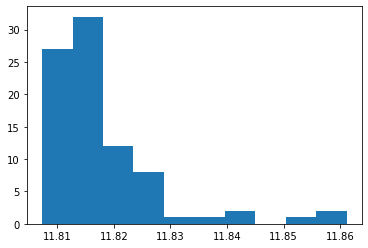

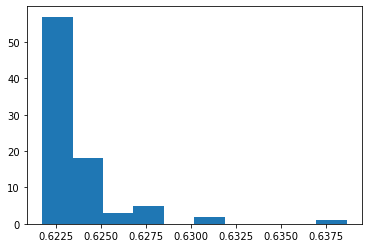

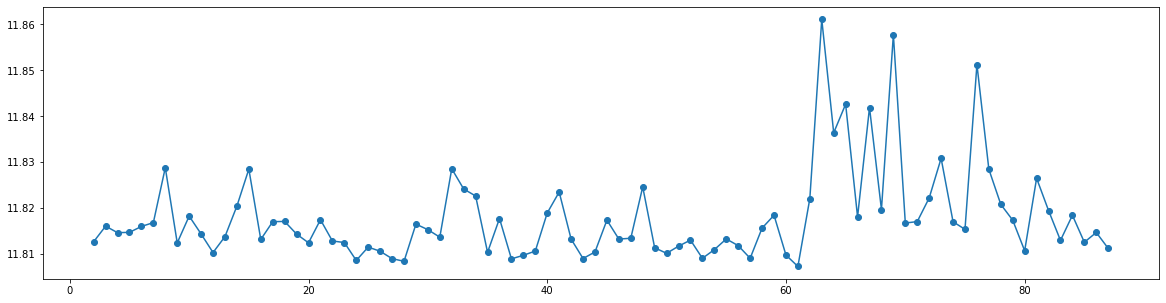

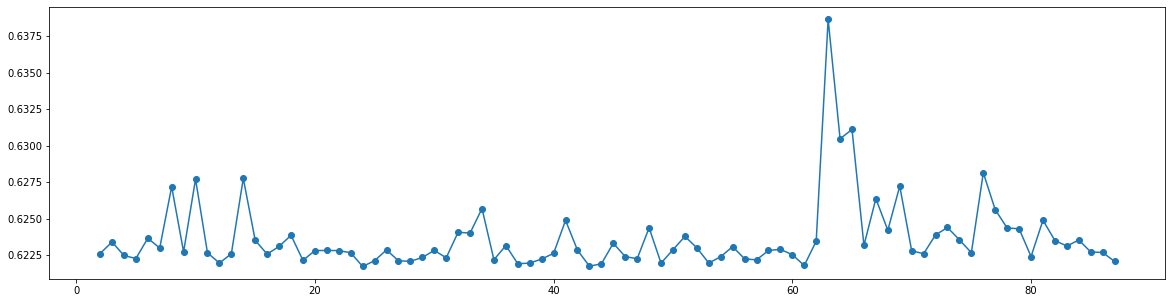

In [14]:
## transpose entropy df and plot sum of inverse entropies at each position to show hotspots (can plot above heatmap)

def plt_scatter(in_df):

    t_df = in_df.T.fillna(0)
    print(t_df)
    row_sum = t_df.sum(axis = 1)
    row_max = t_df.max(axis = 1)
    print(row_sum)
    t_df["sum"] = row_sum
    t_df["max"] = row_max
    plt.hist(t_df["sum"])
    plt.show()
    plt.hist(t_df["max"])
    plt.show()
    #print(t_df)
    t_df.to_csv("../../acrobatx platform development/AGX101_documents/Marsiglia_etal_CellReportsMethods/CR-Methods-Review/analysis/analysisII_acr_esm_hotspot_analysis/2024Feb_acrIIa4_hotspot_scores.csv")
    fig, ax = plt.subplots(figsize=(20, 5))
    plt.scatter(t_df.index, t_df["sum"])
    plt.plot(t_df.index, t_df["sum"])

    #plt.savefig("../../acrobatx platform development/AGX101_documents/Marsiglia_etal_CellReportsMethods/CR-Methods-Review/analysis/analysisII_acr_esm_hotspot_analysis/2024Feb_acrIIa6_hotspot_scatter_lineplot.pdf", 
    #           bbox_inches = "tight")
    
    plt.show()
    
    fig, ax = plt.subplots(figsize=(20, 5))
    plt.scatter(t_df.index, t_df["max"])
    plt.plot(t_df.index, t_df["max"])

#scatter_1 = plt_scatter(plt_1)  
#scatter_2 = plt_scatter(plt_2)

#acrIIa2_scatter = plt_scatter(plt_acrIIa2)
acrIIa4_scatter = plt_scatter(plt_acrIIa4)
#acrIIa6_scatter = plt_scatter(plt_acrIIa6)



In [10]:
#comp_1['points_bin'] = pd.qcut(comp_1['avg_edit_rate'], q=[0, .01, .4, .6, .8, 1])
#print(comp_1)

read_2['points_bin'] = pd.qcut(read_2.index, q=[0, .01, .75, 1])
print(read_2)

               esm+log_likelihood      points_bin
avg_edit_rate                                    
0.597                   -2.485918  (0.313, 0.691]
0.762                   -2.422488  (0.691, 0.868]
0.624                   -2.405217  (0.313, 0.691]
0.569                   -2.400116  (0.313, 0.691]
0.651                   -2.391971  (0.313, 0.691]
...                           ...             ...
0.083                   -1.360638  (0.041, 0.313]
0.441                   -1.353995  (0.313, 0.691]
0.094                   -1.353013  (0.041, 0.313]
0.042                   -1.350800  (0.041, 0.313]
0.265                   -1.349179  (0.041, 0.313]

[2647 rows x 2 columns]


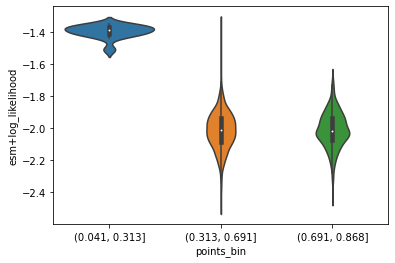

In [12]:
import seaborn as sns

sns.violinplot(data=read_2, x="points_bin", y="esm+log_likelihood")

plt.savefig("../../acrobatx platform development/AGX101_documents/Marsiglia_etal_CellReportsMethods/CR-Methods-Review/analysis/analysisII_acr_esm_hotspot_analysis/ESM_LL_vs_EE.pdf",
           bbox_inches = "tight")





In [57]:
print(comp_1)
comp_1.to_csv("../../esm/acr_dms_sample_data_labeled_entropy.csv")

                                                    avg_edit_rate  \
mut_call                                                            
Q65A                                                        0.063   
N48A                                                        0.119   
W63A                                                        0.320   
G21A                                                        0.177   
F55A                                                        0.638   
...                                                           ...   
E47RN48TE49FK60QN61WG62WW63MN64GQ65ME66WY67HE68...          0.567   
E47NN48WE49HK60WN61CG62WW63SN64WQ65WE66KY67RE68...          0.480   
E47RN48QE49GK60CN61CG62MW63RN64SQ65YE66MY67ME68...          0.674   
E47PN48RE49FK60WN61RG62QW63CN64GQ65FE66WY67QE68...          0.633   
E47WN48WE49WK60NN61LG62TW63CN64YQ65WE66HY67RE68...          0.625   

                                                    esm1v_t33_650M_UR90S_1  \
mut_call                